In [1]:
import math
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import numpy as np
from keras.datasets import cifar10 #50k training images, 10k Testing images and 10 classes
import matplotlib.pyplot as plt

In [2]:
train,test = cifar10.load_data()

In [3]:
X_train_orig,Y_train_orig = train

In [4]:
X_test_orig,Y_test_orig = test

In [5]:
Y_train_orig

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
def convert_to_one_hot(Y,num_classes):
    OHY = []
    for i in Y:
        OH = [0]*num_classes
        OH[i[0]] = 1
        OHY.append(OH)
    return np.array(OHY)

In [7]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 10)
Y_test = convert_to_one_hot(Y_test_orig, 10)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


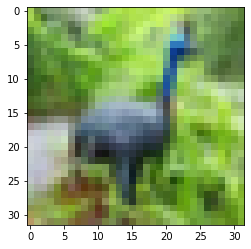

In [8]:
plt.imshow(X_train[6]) #CLASS 6 ie FROG

In [9]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='SAME',activation='relu',strides=(1,1)))
model.add(MaxPooling2D(padding='SAME',pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='SAME',activation='relu',strides=(1,1)))
model.add(MaxPooling2D(padding='SAME',pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,validation_split=0.2,batch_size=1000,epochs=50)

Epoch 1/50
40/40 [==============================] - 36s 910ms/step - loss: 2.0500 - accuracy: 0.2779 - val_loss: 1.7750 - val_accuracy: 0.3692
Epoch 2/50
40/40 [==============================] - 32s 805ms/step - loss: 1.6664 - accuracy: 0.4092 - val_loss: 1.5954 - val_accuracy: 0.4357
Epoch 3/50
40/40 [==============================] - 33s 814ms/step - loss: 1.5259 - accuracy: 0.4624 - val_loss: 1.4888 - val_accuracy: 0.4750
Epoch 4/50
40/40 [==============================] - 33s 834ms/step - loss: 1.4330 - accuracy: 0.4965 - val_loss: 1.4051 - val_accuracy: 0.5114
Epoch 5/50
40/40 [==============================] - 33s 818ms/step - loss: 1.3698 - accuracy: 0.5176 - val_loss: 1.3555 - val_accuracy: 0.5273
Epoch 6/50
40/40 [==============================] - 36s 908ms/step - loss: 1.3021 - accuracy: 0.5459 - val_loss: 1.3059 - val_accuracy: 0.5500
Epoch 7/50
40/40 [==============================] - 35s 868ms/step - loss: 1.2627 - accuracy: 0.5587 - val_loss: 1.2994 - val_accuracy: 0.5519